<a href="https://colab.research.google.com/github/Luke-687/Portfolio/blob/main/QLearningChemotaxisipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import math
import random

#Agent class for everything
class agent:
  def __init__(self, alpha, gamma):
    self.alpha=alpha
    self.gamma=gamma
    self.Qtable = {}
    for i1 in range(0,20):
      for j1 in range(0,20):
        for direction in range(0,8):
          for velocity in range(1,4):
            self.Qtable[((i1,j1),(direction, velocity))] = [0, self.moveForQTable(i1,j1, direction, velocity)] # Added self.
  #Following 3 functions to define Q-table
  def moveForQTable(self, initX, initY, direction, velocity): # Added self
    direction = self.directionKey(direction) # Added self.
    return [(initX + int(math.cos(direction)*velocity)),(initY + int(math.sin(direction)*velocity))]
  def directionKey(self, direction): # Added self
    angle = direction*45
    return angle*math.pi/180
  def reward(self, x,y): # Added self
    fromCenter = math.sqrt((x-9.5)**2+(y-9.5)**2)
    if(fromCenter<5):
      reward = 10/(fromCenter**2)
    if(int(fromCenter) == 0):
      reward=50
    else:
      reward=-50
    return reward

  def trainQTable(self, trainingEpisodes): # Added self
    trainingRewards = [[],[]]
    for iterations in range(trainingEpisodes):
      totReward=0
      currentX = random.randint(0,0)
      currentY = random.randint(0,0)
      for steps in range(0,50):
        direction, velocity = max(
            [(d,v) for d in range(8) for v in range(1,4)],
            key=lambda a: self.Qtable[(currentX,currentY),a][0]
        )
        if(random.random()<0.1):
          direction = random.randint(0,7)
          velocity = random.randint(1,3)
        nextPos = self.moveForQTable(currentX, currentY, direction, velocity)
        nextX = max(0, min(19, nextPos[0]))
        nextY = max(0, min(19, nextPos[1]))
        initReward = self.reward(currentX, currentY)
        nextReward = max(
            self.Qtable[(nextX, nextY), (d,v)][0]
            for d in range(8)
            for v in range(1,4)
        )
        self.Qtable[((currentX,currentY),(direction, velocity))][0] = self.Qtable[((currentX,currentY),(direction, velocity))][0] + self.alpha*(initReward + self.gamma*nextReward-self.Qtable[((currentX,currentY),(direction, velocity))][0])
        currentX = nextX
        currentY = nextY
        totReward+=self.Qtable[((currentX,currentY),(direction, velocity))][0] + self.alpha*(initReward + self.gamma*nextReward-self.Qtable[((currentX,currentY),(direction, velocity))][0])
      trainingRewards[0].append(iterations)
      trainingRewards[1].append(totReward)
    return trainingRewards

  def simulate(self, steps): # Added self
    x=[]
    y=[]
    currentX = 0
    currentY = 0
    for steps in range(0,steps):
      currentX = max(0, min(19, currentX))
      currentY = max(0, min(19, currentY))
      x.append(currentX)
      y.append(currentY)
      rewardOption = -100000
      currentX = int(currentX)
      currentY = int(currentY)
      nextPos = [currentX, currentY]
      for direction in range(0,8):
        for velocity in range(1,4):
          testReward = self.Qtable[(currentX, currentY), (direction, velocity)][0]
          if(testReward>=rewardOption):
            rewardOption = testReward
            nextPos = self.Qtable[(currentX, currentY), (direction, velocity)][1]
      currentX = nextPos[0]+(random.randint(1,2)/20*math.pow(-1, random.randint(1,2)))
      currentY = nextPos[1]+(random.randint(1,2)/20*math.pow(-1, random.randint(1,2)))
    return x,y

In [58]:
#Gradient class
class gradient:
  def __init__(self, xSize, ySize):
    self.dimensions = [xSize, ySize]
  def createGradient(self):
    xG =[]
    yG = []
    gradient_values = []
    for x in range(0, self.dimensions[1]):
      for y in range(0, self.dimensions[0]):
        xG.append(x)
        yG.append(y)
        if(math.sqrt((x-9.5)**2+(y-9.5)**2)<4):
          if(math.sqrt((x-9.5)**2+(y-9.5)**2)>=1):
            gradient_values.append(1/((x-9.5)**2+(y-9.5)**2))
          else:
            gradient_values.append(1)
        else:
          gradient_values.append(0)

    return xG, yG, gradient_values

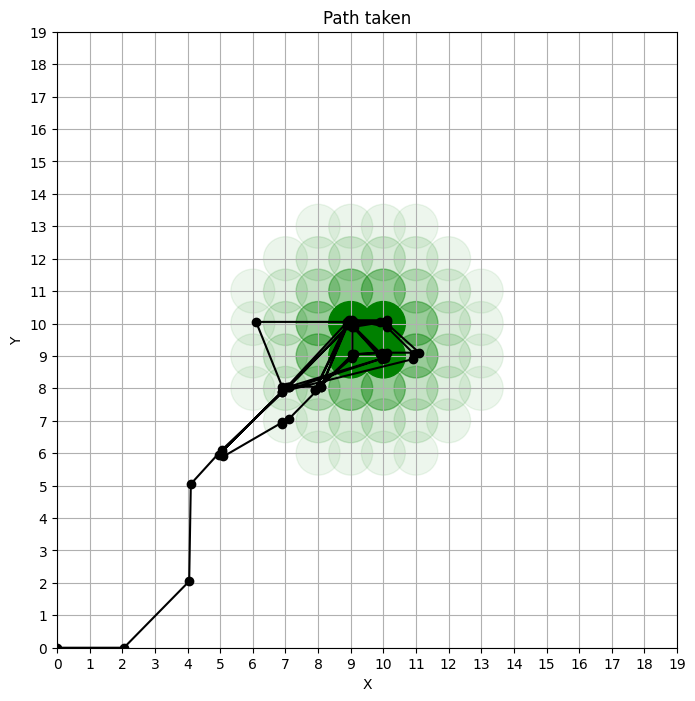

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Path taken')
plt.grid(True)
plt.xlim(0, 19)
plt.ylim(0, 19)
plt.xticks(range(20))
plt.yticks(range(20))

testAgent = agent(0.1, 0.999)
trainingData = testAgent.trainQTable(10000)
x, y = testAgent.simulate(50)
plt.plot(x, y, marker='o', linestyle='-', color='black')

chemoGradient = gradient(19,19)
xG, yG, gradientG = chemoGradient.createGradient()
plt.scatter(xG, yG, color = 'green', s=1000, alpha = gradientG)

plt.show()

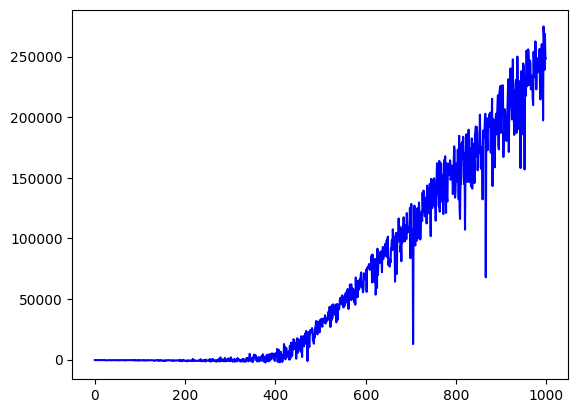

In [60]:
plt.plot(trainingData[0], trainingData[1], c = 'blue')